In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape # color images

(50000, 32, 32, 3)

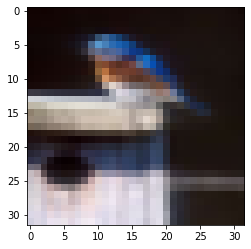

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[13])

In [6]:
x_train.max()

255

In [7]:
# scaling
x_train = x_train/255
x_test = x_test/255

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
# one-hot encoding the labels
from keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [11]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# 128,256,512 (good numbers of neurons)
model.add(Dense(256, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [17]:
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5186 - accuracy: 0.4548
Epoch 2/10
50000/50000 [==============================] - 47s 935us/step - loss: 1.1567 - accuracy: 0.5949
Epoch 3/10
50000/50000 [==============================] - 47s 933us/step - loss: 1.0052 - accuracy: 0.6496
Epoch 4/10
50000/50000 [==============================] - 47s 930us/step - loss: 0.8970 - accuracy: 0.6926
Epoch 5/10
50000/50000 [==============================] - 46s 923us/step - loss: 0.8165 - accuracy: 0.7206
Epoch 6/10
50000/50000 [==============================] - 46s 928us/step - loss: 0.7493 - accuracy: 0.7441
Epoch 7/10
50000/50000 [==============================] - 46s 927us/step - loss: 0.6935 - accuracy: 0.7632
Epoch 8/10
50000/50000 [==============================] - 46s 912us/step - loss: 0.6460 - accuracy: 0.7818
Epoch 9/10
50000/50000 [==============================] - 47s 939us/step - loss: 0.6082 - accuracy: 0.7930
Epoch 10/10
50000/50000 [==============

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 4s 384us/step


[1.0701935889244079, 0.6902999877929688]

In [20]:
from sklearn.metrics import classification_report

In [21]:
predictions = model.predict_classes(x_test)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.78      0.83      0.81      1000
           2       0.62      0.56      0.59      1000
           3       0.51      0.47      0.49      1000
           4       0.65      0.67      0.66      1000
           5       0.57      0.65      0.61      1000
           6       0.78      0.78      0.78      1000
           7       0.67      0.80      0.73      1000
           8       0.88      0.70      0.78      1000
           9       0.83      0.69      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

